**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error

**Data Collection and Processing**

In [5]:
# Loading the csv data to pandas data frame
gold_data= pd.read_csv('gld_price_data.csv') # here in our pd.read_csv we have given the url of our file, to import the dataset

In [6]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# nmbr of rows and colms
gold_data.shape

(2290, 6)

In [9]:
# getting some more basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the numebr of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Spliting the features and target**

Features: other stocks, silver and dollar price etc.
Target: Gold price

In [14]:
# Storing features in x
x= gold_data.drop(['Date', 'GLD'], axis= 1)   # we have removed Data and Gold price from our dataset and we are left with other columns..

# WHILE DROPPING COLMS WE MAKE OUR axis= 1 AND WHILE DROPPING ANY ROWS WE MAKE OUR axis= 0

# Storing gold price colm in y
y = gold_data['GLD']

In [15]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Train Test Split**

In [17]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

SUPPORT VECTOR REGRESSOR

SVR is particularly useful when dealing with nonlinear relationships between features and the target variable

In [28]:
# Importing SVR libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [29]:
# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
# Training the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(x_train_scaled, y_train)

SVR()

In [31]:
# Making predictions
y_pred = svr_model.predict(x_test_scaled)

In [35]:
# Calculating R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


R2 Score: 0.9847304499139271
Mean Absolute Error: 1.476287991266375


MODEL TRAINING

Decision Trees

In [22]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

Model Evaluation


In [23]:
# Making predictions
predictions = model.predict(x_test)

# Calculating R2 score and Mean Absolute Error
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')


R2 Score: 0.9847304499139271
Mean Absolute Error: 1.476287991266375


In [37]:
# Example hyperparameter tuning
model_tuned = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
model_tuned.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

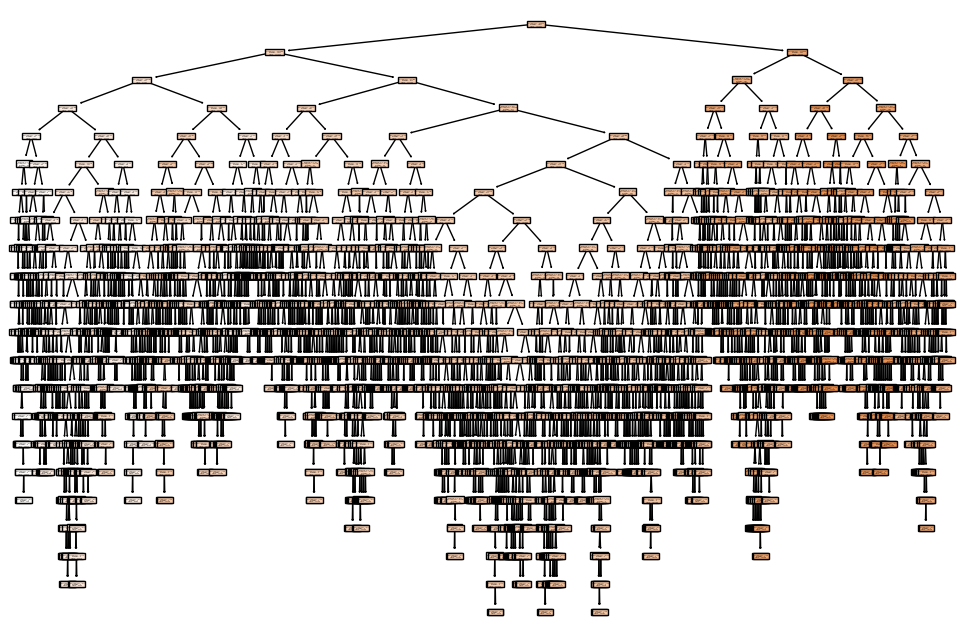

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x_train.columns)
plt.show()


Making Decision Tree Better 

By using Hyper Parameter Tuning


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(x_test)

# Calculate R2 score and MAE with the best model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'\nR2 Score with best model: {r2}')
print(f'Mean Absolute Error with best model: {mae}')


Best Parameters:
max_depth: 10
max_features: auto
min_samples_leaf: 1
min_samples_split: 10

R2 Score with best model: 0.9822622770385951
Mean Absolute Error with best model: 1.662358400883422


c:\Users\bhavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [43]:
# To make the Hyper-parameters even better..
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with expanded search space
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(x_test)

# Calculate R2 score and MAE with the best model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score with best model: {r2}')
print(f'Mean Absolute Error with best model: {mae}')


Best Parameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
R2 Score with best model: 0.9858470093926054
Mean Absolute Error with best model: 1.436482894763291


c:\Users\bhavi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


**Model Training**

Random Forest Regressor


In [57]:
#Importing the Libraries for RDR..
from sklearn.ensemble import RandomForestRegressor

In [58]:
# Training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
# Making predictions
y_pred = rf_regressor.predict(x_test)

In [60]:
# Calculating R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R2 Score: 0.9900245384549384
Mean Absolute Error: 1.2356137487336276


**Compare the actual values and the predited values in a plot**

In [50]:
# Converting our y_test into a list to avoid error while plotting it
y_test= list(y_test)

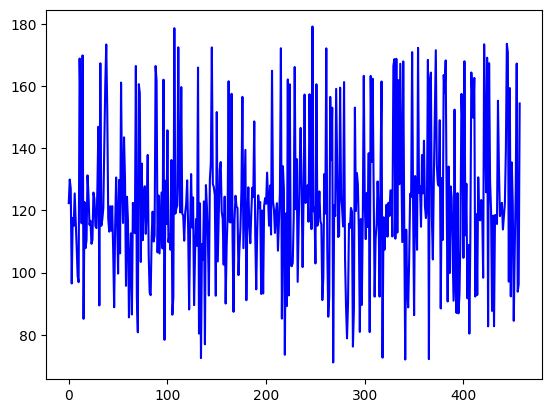

In [51]:
plt.plot(y_test, color= "blue", label = "Actual Value")

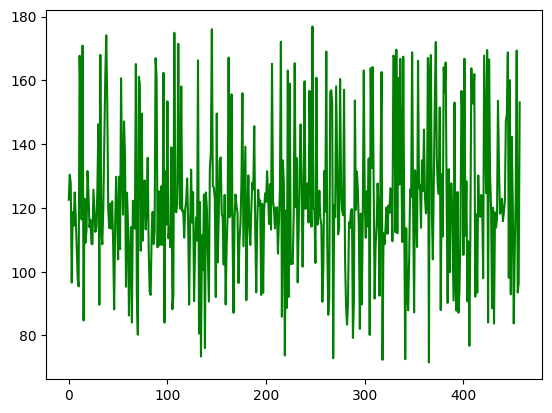

In [61]:
plt.plot(test_data_prediction, color= "green", label= "Predicted Values")

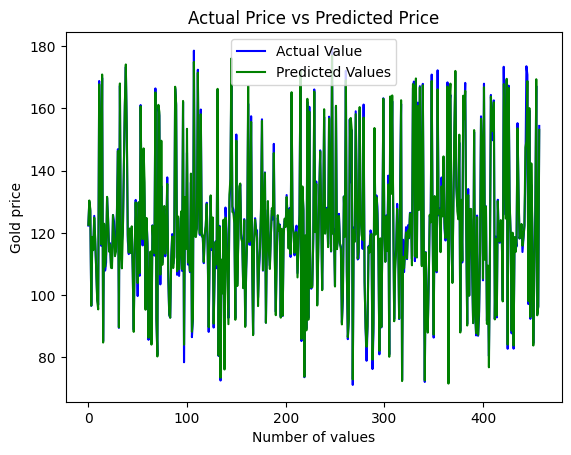

In [62]:
plt.plot(y_test, color= "blue", label = "Actual Value")
plt.plot(test_data_prediction, color= "green", label= "Predicted Values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()